In [2]:
# Ход работы:

In [3]:
# 1.Загрузка набора данных
import pandas as pd

df = pd.read_csv('time_messagees.csv')
df.columns = ['Time', 'Messages']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86395 entries, 0 to 86394
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      86395 non-null  object 
 1   Messages  86395 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [5]:
# Преобразование столбца Time в секунды
df['Time'] = pd.to_timedelta(df['Time']).dt.total_seconds()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86395 entries, 0 to 86394
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      86395 non-null  float64
 1   Messages  86395 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB


In [6]:
# 2.Построение модели линейной регрессии
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['Time']], df['Messages'])

LinearRegression()

In [7]:
# 3.Оценка модели
r_squared = model.score(df[['Time']], df['Messages'])
print("Коэффициент детерминации (R2):", r_squared)

# Предсказание значений
predicted_messages = model.predict(df[['Time']])

Коэффициент детерминации (R2): 0.0044693330803268205


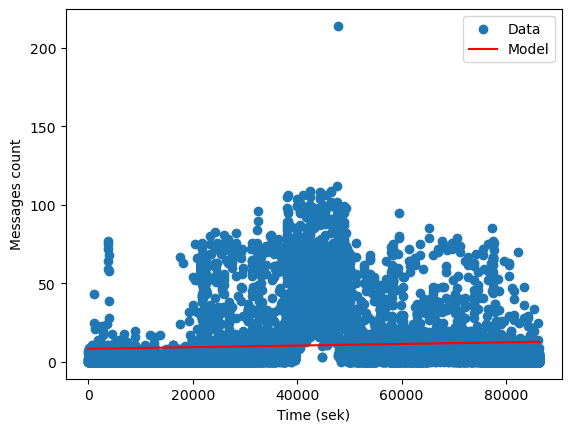

In [8]:
# 4.Построение графика данных и модели
import matplotlib.pyplot as plt

plt.scatter(df['Time'], df['Messages'], label='Data')
plt.plot(df['Time'], predicted_messages, color='red', label='Model')
plt.xlabel('Time (sek)')
plt.ylabel('Messages count')
plt.legend()
plt.show()

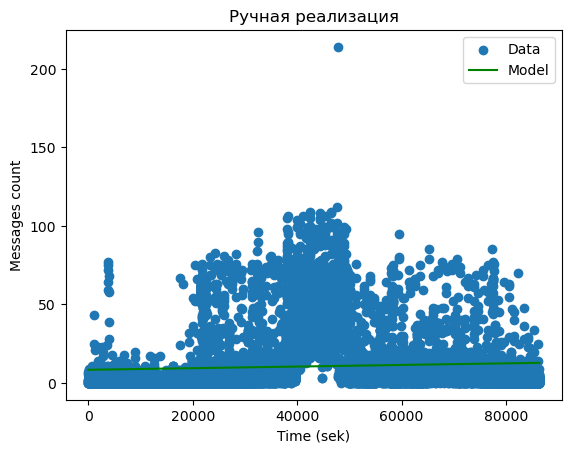

In [9]:
# Реализация модели линейной регрессии самостоятельно
import numpy as np
x = np.array(df['Time'])
y = np.array(df['Messages'])

# 1)Расчет коэффициентов
X_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - X_mean) * (y - y_mean))
denominator = np.sum((x - X_mean)**2)

b1 = numerator / denominator
b0 = y_mean - (b1 * X_mean)

# 2) Предсказание значений
predicted_messages_manual = b1 * x + b0

# 3) Построение графиков
plt.scatter(df['Time'], df['Messages'], label='Data')
plt.plot(df['Time'], predicted_messages_manual, color='green', label='Model')
plt.title('Ручная реализация')
plt.xlabel('Time (sek)')
plt.ylabel('Messages count')
plt.legend()
plt.show()

In [10]:
print('Вывод:\n')
with open('conclusion.txt', 'r', encoding='utf-8') as file:
    print(file.read())

Вывод:

Коэффициент детерминации R2 (0.004) указывает на то, что модель не объясняет вариабельность данных. Следовательно, модель может быть неэффективной или в данных может не быть линейной связи.

Полученные результаты графиков говорят о том, что предсказанная модель плохо справляется с прогнозированием данных, большое количество значений выходит за линию истинных.
